In [1]:
!pip install keras

In [2]:
import numpy as np # We'll be storing our data as numpy arrays
import pandas as pd
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from matplotlib.pyplot import imshow

import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers.core import Dense 
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/moroccan_data challenge/train.csv') # read 10 lines from the training data file from working directory (, nrows=100)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      450 non-null    int64 
 1   plate_string  450 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


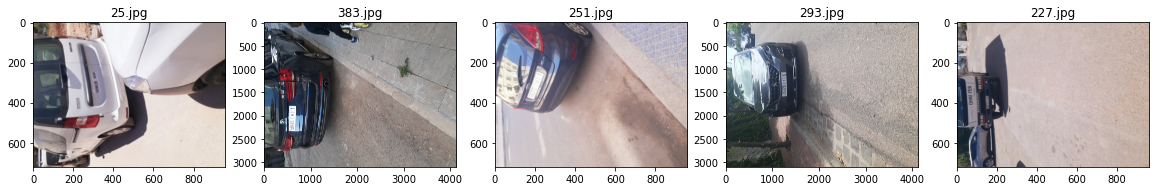

In [5]:
import random

plt.figure(figsize=(20,20))
test_folder=r'/content/drive/MyDrive/train'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
IMG_WIDTH=200
IMG_HEIGHT=200
path=r'/content/drive/MyDrive/train/'
dirs = os.listdir(path)
from PIL import Image

In [7]:
len(dirs)

444

In [9]:
dirs

['121.jpg',
 '123.jpg',
 '122.jpg',
 '125.jpg',
 '124.jpg',
 '127.jpg',
 '126.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '132.jpg',
 '131.jpg',
 '130.jpg',
 '133.jpg',
 '135.jpg',
 '134.jpg',
 '136.jpg',
 '137.jpg',
 '139.jpg',
 '138.jpg',
 '140.jpg',
 '141.jpg',
 '14.jpg',
 '143.jpg',
 '142.jpg',
 '146.jpg',
 '144.jpg',
 '145.jpg',
 '147.jpg',
 '148.jpg',
 '150.jpg',
 '151.jpg',
 '149.jpg',
 '15.jpg',
 '153.jpg',
 '152.jpg',
 '154.jpg',
 '156.jpg',
 '157.jpg',
 '155.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '162.jpg',
 '161.jpg',
 '165.jpg',
 '164.jpg',
 '163.jpg',
 '166.jpg',
 '168.jpg',
 '169.jpg',
 '167.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 '176.jpg',
 '181.jpg',
 '180.jpg',
 '178.jpg',
 '183.jpg',
 '184.jpg',
 '177.jpg',
 '182.jpg',
 '179.jpg',
 '18.jpg',
 '193.jpg',
 '191.jpg',
 '189.jpg',
 '20.jpg',
 '199.jpg',
 '195.jpg',
 '202.jpg',
 '201.jpg',
 '200.jpg',
 '185.jpg',
 '196.jpg',
 '188.jpg',
 '187.jpg',
 '194.jpg',

In [10]:
dirs_ = []
for i in range(len(dirs)):
  dirs_.append(int(dirs[i][:-4]))

In [11]:
dirs_

[121,
 123,
 122,
 125,
 124,
 127,
 126,
 128,
 129,
 13,
 132,
 131,
 130,
 133,
 135,
 134,
 136,
 137,
 139,
 138,
 140,
 141,
 14,
 143,
 142,
 146,
 144,
 145,
 147,
 148,
 150,
 151,
 149,
 15,
 153,
 152,
 154,
 156,
 157,
 155,
 158,
 159,
 16,
 160,
 162,
 161,
 165,
 164,
 163,
 166,
 168,
 169,
 167,
 17,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 181,
 180,
 178,
 183,
 184,
 177,
 182,
 179,
 18,
 193,
 191,
 189,
 20,
 199,
 195,
 202,
 201,
 200,
 185,
 196,
 188,
 187,
 194,
 198,
 186,
 2,
 192,
 19,
 190,
 197,
 217,
 224,
 211,
 228,
 222,
 225,
 215,
 231,
 206,
 205,
 227,
 203,
 223,
 21,
 216,
 212,
 209,
 218,
 221,
 230,
 220,
 232,
 208,
 23,
 22,
 207,
 226,
 219,
 204,
 229,
 213,
 210,
 214,
 250,
 248,
 258,
 236,
 251,
 239,
 245,
 246,
 235,
 237,
 25,
 247,
 257,
 241,
 253,
 242,
 243,
 254,
 234,
 238,
 240,
 256,
 255,
 244,
 252,
 233,
 249,
 259,
 24,
 261,
 26,
 260,
 262,
 263,
 265,
 266,
 267,
 264,
 268,
 269,
 27,
 272,
 270,
 271,
 274,
 27

In [12]:
df_ = pd.DataFrame(dirs_)

In [13]:
df_.columns = ['image_id']

In [14]:
df_

,image_id
0,121
1,123
2,122
3,125
4,124
...,...
439,117
440,118
441,119
442,12


In [15]:
df_ =  df_.merge(df, on='image_id', how='left')
df_

,image_id,plate_string
0,121,9491d8
1,123,557330ww
2,122,9491d8
3,125,17666d8
4,124,557330ww
...,...,...
439,117,609008ww
440,118,82141d6
441,119,46756b1
442,12,558a1


In [16]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 1.2 MB/s 
     |████████████████████████████████| 47.7 MB 1.7 MB/s 


In [17]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [18]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.5 MB/s 


In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

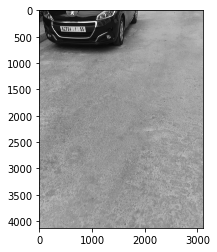

In [20]:
img = cv2.imread('/content/drive/MyDrive/train/432.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

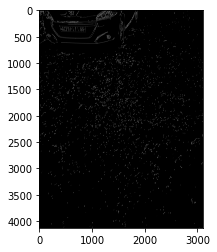

In [21]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [22]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [23]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [24]:
location

array([[[395, 306]],

       [[419, 405]],

       [[885, 412]],

       [[870, 309]]], dtype=int32)

In [25]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [26]:
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


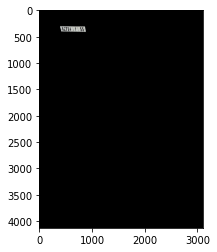

In [27]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [28]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

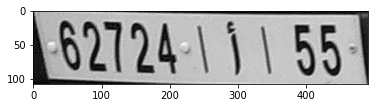

In [29]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [30]:
reader = easyocr.Reader(['ar'])
result = reader.readtext(cropped_image)
text = result[0][-2]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


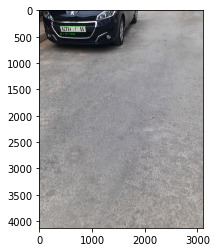

In [31]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [32]:
text

'55 / أ / 02724'

In [ ]:
T = []
for i in dirs:
  img = cv2.imread('/content/drive/MyDrive/train/'+str(i))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
  edged = cv2.Canny(bfilter, 30, 200) #Edge detection
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] 
  location = None
  for contour in contours:
      approx = cv2.approxPolyDP(contour, 10, True)
      if len(approx) == 4:
          location = approx
          break
  mask = np.zeros(gray.shape, np.uint8)
  
  location = [location]
  print(len(location))
  if location[0] is not None  :
    new_image = cv2.drawContours(mask, location, 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    reader = easyocr.Reader(['ar'])
    result = reader.readtext(cropped_image)
    text = result
    T.append(text)
  else :
    T.append(None)

1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1
1
1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


1


In [38]:
len(T)

444

In [42]:
for i in range(444) :
  if T[i]!=[] and T[i]!=None:
    T[i]=T[i][0][-2]
    


In [45]:
T

[None,
 ' ٥',
 [],
 [],
 '557330',
 [],
 [],
 [],
 None,
 None,
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 None,
 [],
 None,
 [],
 [],
 [],
 'م',
 '١٢',
 [],
 None,
 [],
 [],
 None,
 None,
 None,
 None,
 [],
 [],
 [],
 [],
 [],
 None,
 [],
 None,
 [],
 [],
 [],
 '340٥2',
 None,
 [],
 None,
 [],
 [],
 None,
 None,
 [],
 '٥ ١',
 [],
 None,
 [],
 None,
 [],
 [],
 '5 / و /5354|',
 [],
 '5',
 [],
 '59',
 '59',
 [],
 [],
 [],
 [],
 '٨ ٧٠ ٨٧٧٧',
 '٦٠ ١أ١',
 '2 ١ ئ١ ١2٥٥٥٥٠',
 [],
 'ب',
 '3/067',
 [],
 'ذ',
 'آ',
 None,
 '3/٥57',
 '2 ١ئ١ ١2٥٥٥٥',
 [],
 [],
 [],
 [],
 '15',
 [],
 [],
 '45454 ',
 '١١١',
 [],
 [],
 [],
 [],
 '72267',
 '6 / ب |',
 '682',
 [],
 [],
 [],
 '0_',
 [],
 '40663',
 [],
 '5؟١',
 [],
 '،٦،٢٦',
 None,
 '72257',
 [],
 [],
 [],
 '{7?470',
 '5785',
 '5785',
 '28209',
 '6 ١ ب|',
 [],
 [],
 '59017',
 [],
 '١١١١ ١',
 [],
 [],
 [],
 [],
 'لآران',
 '|55212',
 '٥',
 [],
 '502',
 [],
 '28800/~/8',
 None,
 [],
 '٧٧',
 [],
 [],
 [],
 '7924٥ ٠١ ٥',
 [],
 [],
 '8 إب',
 'د / 59502',
 '١ 1١ 1،',


In [49]:
for i in range(444) :
  if T[i]!=[] and T[i]!=None:
    mystring = T[i]
    T[i] = mystring.replace("أ","a")
    T[i] = mystring.replace("ب","b")
    T[i] = mystring.replace("ج","j")
    T[i] = mystring.replace("د","d")
    T[i] = mystring.replace("ه","h")
    T[i] = mystring.replace("و","waw")
    T[i] = mystring.replace("w","w")
    T[i] = mystring.replace("ش","p")
    T[i] = mystring.replace("ق س","fx")
    T[i] = mystring.replace("المغرب","m")
    T[i] = mystring.replace("M","m")
    T[i] = mystring.replace("ق م م","far")
    